In [1]:
# import libs
import colorsys
import random
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

In [27]:
# 定义rgb转换为hsv的函数,输出的HSV范围：0~1
def rgb_to_hsv(color_rgb):
    color_hsv = list(colorsys.rgb_to_hsv(color_rgb[0]/255,color_rgb[1]/255,color_rgb[2]/255))
    return color_hsv

# 定义hsv转换为rgb的函数,输出的RGB范围：0~255
def hsv_to_rgb(color_hsv):
    color_rgb = colorsys.hsv_to_rgb(color_hsv[0],color_hsv[1],color_hsv[2])
    color_rgb = list(map(lambda x: x * 255, color_rgb))
    return color_rgb

# 定义可视化函数:
def color_visualize(matched_colors):
#     建立画布
    canvas = Image.new('RGB', (100 * len(matched_colors), 100), (255, 255, 255))
#     绘制配色方案
    draw = ImageDraw.Draw(canvas)
    for i, color in enumerate(matched_colors):
        draw.rectangle((i*100, 0, i* 100 + 100, 100), tuple(color))
    return canvas

# 色调分类及区间范围：
hue_dict = {
#         0:'Red',
#         1:'Yellow',
#         2:'Yellow',
#         3:'Chartreuse green',
#         4:'Green',
#         5:'Spring green'
#         6:'Cyan',
#         7:'Azure',
#         8:'Blue',
#         9:'Violet',
#         10:'Magenta',
#         11:'Rose',
    0:[-15,15],
    1:[15,45],
    2:[45,75],
    3:[75,105],
    4:[105,135],
    5:[135,165],
    6:[165,195],
    7:[225,255],
    8:[255,285],
    9:[285,315],
    10:[315,345],
    11:[345,375]
    }

# 12个色域的hue列表：
hue_lst = [0,1,2,3,4,5,6,7,8,9,10,11] 


# 对输入的颜色进行归类：并返回归类值索引（int）: [0~11]
def input_color_class(input_color):
    hue = int(input_color[0]*360/30)
    return(hue)

# 输入目标色域列表hue_lst，随机生成列表中每个色域下随机颜色HSV(0~1)，并返回颜色列表：
def create_color(target_hue):
    result_colors = []
    for i in target_hue:
        hue_limit_min = hue_dict[i][0]
        hue_limit_max = hue_dict[i][1] #获取该色域值的取值范围
        color_created = input_color.copy() #将输入颜色的s/v值传递给预生成的颜色列表 
        color_created[0] = random.uniform(hue_limit_min,hue_limit_max) #随机生成该色域下的H值
#       对hue值进行处理范围为：0~360
        if color_created[0] < 0:
                color_created[0] = 360 + color_created[0]
        elif color_created[0] > 360:
                color_created[0] = color_created[0] - 360
        else:
            pass
#       将符合格式的color_created添加到结果列表中
        color_created[0] = color_created[0]/360
        result_colors.append(color_created) #每一个对应的hue_lst内的色域内随机生成的颜色放进结果列表中
    return (result_colors) #将结果颜色列表返回


# 配色模式：编辑生成hue_lst[]的配色模式的类：
# 1.单一配色模式：number = 2,3,4,5
def mono(number,input_color):
    result_colors = []
    hue = input_color_class(input_color)
    hue_lst = []
    for i in list(range(0,number-1)): #添加(n-1）个相同色域到色域列表中
        hue_lst.append(hue)
    result_colors = create_color(hue_lst)
    return(result_colors) #返回一组配好的颜色(hsv)嵌套列表

# 2.相似配色模式：number = 2,3,4,5
class Ana(): 
    def __init__(self,number,input_color):
        self.number = number
        self.input_color = input_color
        self.collected_hue_down = []
        self.collected_hue_up = []
        self.hue = input_color_class(self.input_color) #获取输入颜色的hue值(int):[0,11]
        self.target_hue = []
    
    #   根据输入的input_color值确定备选色域的hue值的上下区间两个列表：
    def hue_selected(self):
        hue_down = []
        hue_up = []
        if self.hue == 10:
            hue_down = [self.hue-2,self.hue-1]
            hue_up = [11,0]
        elif self.hue == 11:
            hue_down = [self.hue-2,self.hue-1]
            hue_up = [0,1]
        else:
            hue_down = [hue_lst[self.hue-2],hue_lst[self.hue-1]]
            hue_up = [self.hue+1,self.hue+2] 
        self.collected_hue_down = hue_down
        self.collected_hue_up = hue_up
    
#     根据输入的颜色数量,返回该模式下颜色hue列表：
    def get_target_lst(self):
        
        if self.number == 2:
            hue = random.choice( (self.collected_hue_down[1],self.collected_hue_up[0])) 
            self.target_hue.append(hue)

        elif self.number == 3:
            self.target_hue = [self.collected_hue_down[1],self.collected_hue_up[0]]

        elif self.number == 4:
            self.target_hue = [self.collected_hue_down[1],self.collected_hue_up[0]]
            self.target_hue.append(random.choice([self.collected_hue_down[0],self.collected_hue_up[1]]))
            
        elif self.number == 5:
            self.target_hue = self.collected_hue_down + self.collected_hue_up
   

    def output(self):
        self.hue_selected()
        self.get_target_lst()
        return self.target_hue
    

# 3.互补色+相似色模式：输出匹配后的hue列表：n=3,4,5,
class Ana_Com():
    def __init__(self, number,input_color):
        self.number = number
        self.input_color = input_color
        self.hue = input_color_class(self.input_color)
        self.target_hue = []
        
    def hue_lst(self):  #根据颜色数量返回相应的目标hue列表
#       将补色加入到hue列表
        if self.hue >= 6:
                self.target_hue.append(hue_lst[self.hue-6])
        else:
                self.target_hue.append(hue_lst[self.hue+6])
        
        
#       根据number的不同，将相似色加入列表

        if self.number == 3:
            if self.hue == 11:
                self.target_hue.append(random.choice([10,0]))
            else:
                self.target_hue.append(random.choice([hue_lst[self.hue-1],hue_lst[self.hue+1]]))
        elif self.number == 4:
            if self.hue == 11:
                self.target_hue = [10,0] + self.target_hue
            else:
                self.target_hue = [hue_lst[self.hue-1],hue_lst[self.hue+1]] + self.target_hue
        elif self.number == 5:
            if self.hue == 11:
                self.target_hue = [10,0,11] + self.target_hue
            else:
                self.target_hue.append(self.hue)
                self.target_hue = self.target_hue + [hue_lst[self.hue-1],hue_lst[self.hue+1]]
        return self.target_hue
    
    def output(self):
        return self.hue_lst()

    
# 4.三角形配色模式：T（正三角形）、S（互补三角形）模式 n = 3
class Tri():
    def __init__(self,input_color):
        self.input_color = input_color
        self.hue = input_color_class(self.input_color)
        self.target_hue = []
        
    def split_com(self):
        if self.hue == 6:
            self.target_hue = [11,1]
        elif self.hue == 5:
            self.target_hue = [10,0]
        elif self.hue > 6:
            self.target_hue = [hue_lst[self.hue-7],hue_lst[self.hue-5]]
        elif self.hue < 5:
            self.target_hue = [hue_lst[self.hue+6-1],hue_lst[self.hue+6+1]]
        return self.target_hue
    
    def tri(self):
        if self.hue > 7:
            self.target_hue = [self.hue + 4 -12,self.hue-4]
        else:
            self.target_hue = [hue_lst[self.hue-4],hue_lst[self.hue+4]]
        return self.target_hue 
                      
    def output(self):
        signal = input('''\n>>>please choose match type: S or T\n(S means Split-Complementary, T means Triadic)
your answer is ''')
        if signal == 'T':
            return self.tri()
        elif signal == 'S':
            return self.split_com()


# 5.四角形配色模式： n = 4
class Square():
    def __init__(self,input_color):
        self.input_color = input_color
        self.hue = input_color_class(self.input_color)
        self.target_hue = []
    def sq(self):
        self.target_hue = [hue_lst[self.hue-3],hue_lst[self.hue-6],hue_lst[self.hue-9]]
        return self.target_hue
    def output(self):
        self.sq()
        return self.target_hue



>>>plese enter a color with RGB:156,54,66

>>>please enter colour matching model:
                         enter 1:单色配色（Monochrome）
                         enter 2:相似色配色（Analogous）
                         enter 3:相似&互补色配色（Analogous & Complementent) 
                         enter 4:三角形配色（Tri）
                         enter 5:正方形配色（Square) 
your answer is: 4

>>>please choose match type: S or T
(S means Split-Complementary, T means Triadic)
your answer is T

 [[89, 156, 54], [54, 64, 156], [156, 54, 66]]


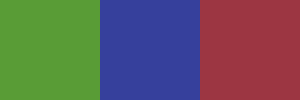

In [28]:
# 输入一个颜色的rgb值并保存为列表，并将列表的元素类型转化为数值型并
input_color = input('>>>plese enter a color with RGB:').split(',') 
input_color = list(map(eval,input_color))

# 将rgb转换为hsv值 [0~1]
input_color = rgb_to_hsv(input_color)

#输入配色的模式，如序号不正确则要求用户重新输入 model=1，2,3,4,5 
while True: 
    model = int(input('''\n>>>please enter colour matching model:
                         enter 1:单色配色（Monochrome）
                         enter 2:相似色配色（Analogous）
                         enter 3:相似&互补色配色（Analogous & Complementent) 
                         enter 4:三角形配色（Tri）
                         enter 5:正方形配色（Square) 
your answer is: ''')) 
    
    if model <=5 | model >=1: 
        break
        
# 根据不同的配色模式，要求用户输入正确的配色数量：
if model ==1: 
#单一配色模式： 
    while True: 
        number = int(input('''\n>>>please enter the number of color you want:(you could get colors between 2 to 5)
your answer is: '''))
# 输入并判断数字是否在该配色模式的范围内：
        if number <=5 | number >=2:
            break
        else:
            print('please enter the right number of colors to be matched!')
# 执行配色,返回的是配好包含hsv色组的嵌套列表
    target_colors = mono(number,input_color)

elif model ==2: #相似色模式(n=2,3,4,5) 
    while True: 
        number = int(input('''\n>>>please enter the number of color you want:(you could get colors between 2 to 5)
your answer is: '''))

# 输入并判断数字是否在该配色模式的范围内：
        if number <=5 | number >=2:
            break
        else:
            print('please enter the right number of colors to be matched!')
#     执行配色,返回的是配好包含hsv色组的嵌套列表
    s = Ana(number,input_color)
    target_hue = s.output()        
    target_colors = (create_color(target_hue))

elif model == 3: #相似&互补色模式（n=3,4,5） 
    while True: 
        number = int(input('''\n>>>please enter the number of color you want:(you could get colors between 2 to 5)
your answer is: '''))

# 输入并判断数字是否在该配色模式的范围内：
        if number <=5 | number >=3:
            break
        else:
            print('please enter the right number of colors to be matched!')
#     执行配色,返回的是配好包含hsv色组的嵌套列表
    s = Ana_Com(number,input_color)
    target_hue = s.output()        
    target_colors = (create_color(target_hue))

elif model == 4: #三角形配色 n=3 number = 3

#     执行配色,返回的是配好包含hsv色组的嵌套列表
    s = Tri(input_color)
    target_hue = s.output()
    target_colors = (create_color(target_hue))


elif model == 5: #矩形配色 n=4 number = 4
#     执行配色,返回的是配好包含hsv色组的嵌套列表:
    s = Square(input_color)
    target_hue = s.output()
    target_colors = (create_color(target_hue))

#     
target_colors.append(input_color)
target_colors_rgb = []
for item in target_colors: 
    target_colors_rgb.append(hsv_to_rgb(item))

for item in target_colors_rgb: 
    for i,value in enumerate(item): 
        item[i] = int(value)

print('\n',target_colors_rgb)
color_visualize(target_colors_rgb)